# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Adrenalin Apprizal
- **Email:** adrenalinaapprizal@gmail.com
- **ID Dicoding: aapprizal

## Menentukan Pertanyaan Bisnis


- Bagaimana penyebaran pembelian produk berdasarkan pelanggan dan seberapa banyak frekuensi pembelian oleh pelanggan
- Bagaimana penyebaran penjualan produk berdasarkan City dan State dengan seberapa banyak frekuensi produk yang berhasil terjual
- Bagaimana ketertarikan pelanggan terhadap suatu produk, apa saja produk yang meraih penjualan terbanyak dan produk apa yang mendapatkan penjualn terendah
- Bagaimana waktu dapat memengaruhi pelanggan untuk pembelian suatu produk

## Import Semua Packages/Library yang Digunakan

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [4]:
customers_df = pd.read_csv("./data/customers_dataset.csv")
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [5]:
orders_df = pd.read_csv("./data/orders_dataset.csv")
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [6]:
order_items_df = pd.read_csv("./data/order_items_dataset.csv")
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [7]:
products_df = pd.read_csv("./data/products_dataset.csv")
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [8]:
sellers_df = pd.read_csv("./data/sellers_dataset.csv")
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [9]:
product_category_df = pd.read_csv("./data/product_category_name_translation.csv")
product_category_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [10]:
# Menggabungkan tabel orders_df dan customers_df
join_df1 = pd.merge(
    left=orders_df,
    right=customers_df,
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)
join_df1.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


In [11]:
# Menggabungkan tabel order_items_df, sellers_df, products_df, dan products_category_df
join_df2 = pd.merge(
    pd.merge(
        order_items_df, sellers_df,
        how = "left", on='seller_id'
        ),
    pd.merge(
        products_df, product_category_df,
        how = "left",
        on='product_category_name'
        ),
    how="left",
    on="product_id"
    )
join_df2.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,27277,volta redonda,SP,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,3471,sao paulo,SP,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0,pet_shop
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,37564,borda da mata,MG,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0,furniture_decor
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,14403,franca,SP,perfumaria,42.0,480.0,1.0,200.0,16.0,10.0,15.0,perfumery
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,87900,loanda,PR,ferramentas_jardim,59.0,409.0,1.0,3750.0,35.0,40.0,30.0,garden_tools


### Assessing Data

In [12]:
# Menilai tabel join_df1
print("Jumlah duplikasi: ", join_df1.duplicated().sum())
join_df1.describe()

Jumlah duplikasi:  0


,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


In [13]:
# Menilai apakah ada missing value
join_df1.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
dtype: int64

In [14]:
#Melihat deskripsi statistik tabel joined_df1
join_df1.describe(include='all')

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441,99441,99281,97658,96476,99441,99441,99441.000000,99441,99441
unique,99441,99441,8,98875,90733,81018,95664,459,96096,NaN,4119,27
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,1,96478,3,9,47,3,522,17,NaN,15540,41746
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58900.000000,NaN,NaN


In [15]:
# Menilai tabel join_df2
print("Jumlah duplikasi: ", join_df2.duplicated().sum())
join_df2.describe()

Jumlah duplikasi:  0


,order_item_id,price,freight_value,seller_zip_code_prefix,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,112650.000000,112650.000000,112650.000000,112650.000000,111047.000000,111047.000000,111047.000000,112632.000000,112632.000000,112632.000000,112632.000000
mean,1.197834,120.653739,19.990320,24439.170431,48.775978,787.867029,2.209713,2093.672047,30.153669,16.593766,22.996546
std,0.705124,183.633928,15.806405,27596.030909,10.025581,652.135608,1.721438,3751.596884,16.153449,13.443483,11.707268
min,1.000000,0.850000,0.000000,1001.000000,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,1.000000,39.900000,13.080000,6429.000000,42.000000,348.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,1.000000,74.990000,16.260000,13568.000000,52.000000,603.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,1.000000,134.900000,21.150000,27930.000000,57.000000,987.000000,3.000000,1800.000000,38.000000,20.000000,30.000000
max,21.000000,6735.000000,409.680000,99730.000000,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


In [16]:
# Menilai apakah ada missing value
join_df2.isna().sum()

order_id                            0
order_item_id                       0
product_id                          0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
seller_zip_code_prefix              0
seller_city                         0
seller_state                        0
product_category_name            1603
product_name_lenght              1603
product_description_lenght       1603
product_photos_qty               1603
product_weight_g                   18
product_length_cm                  18
product_height_cm                  18
product_width_cm                   18
product_category_name_english    1627
dtype: int64

In [17]:
# Melihat deskripsi statistik tabel joined_df2
join_df2.describe(include='all')

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000,112650.000000,112650,112650,111047,111047.000000,111047.000000,111047.000000,112632.000000,112632.000000,112632.000000,112632.000000,111023
unique,98666,NaN,32951,3095,93318,NaN,NaN,NaN,611,23,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,2017-07-21 18:25:23,NaN,NaN,NaN,sao paulo,SP,cama_mesa_banho,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bed_bath_table
freq,21,NaN,527,2033,21,NaN,NaN,NaN,27983,80342,11115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11115
mean,NaN,1.197834,NaN,NaN,NaN,120.653739,19.990320,24439.170431,NaN,NaN,NaN,48.775978,787.867029,2.209713,2093.672047,30.153669,16.593766,22.996546,NaN
std,NaN,0.705124,NaN,NaN,NaN,183.633928,15.806405,27596.030909,NaN,NaN,NaN,10.025581,652.135608,1.721438,3751.596884,16.153449,13.443483,11.707268,NaN
min,NaN,1.000000,NaN,NaN,NaN,0.850000,0.000000,1001.000000,NaN,NaN,NaN,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000,NaN
25%,NaN,1.000000,NaN,NaN,NaN,39.900000,13.080000,6429.000000,NaN,NaN,NaN,42.000000,348.000000,1.000000,300.000000,18.000000,8.000000,15.000000,NaN
50%,NaN,1.000000,NaN,NaN,NaN,74.990000,16.260000,13568.000000,NaN,NaN,NaN,52.000000,603.000000,1.000000,700.000000,25.000000,13.000000,20.000000,NaN
75%,NaN,1.000000,NaN,NaN,NaN,134.900000,21.150000,27930.000000,NaN,NaN,NaN,57.000000,987.000000,3.000000,1800.000000,38.000000,20.000000,30.000000,NaN


### Cleaning Data

In [18]:
# Mengubah customer_city menjadi diawali oleh huruf kapital
join_df1["customer_city"] = join_df1["customer_city"].apply(lambda city: " ".join(
    [s.capitalize() if s.lower() not in {"da", "de", "do", "das", "dos"} else s for s in city.split()]))

In [19]:
# Mengubah sellers_city menjadi diawali oleh huruf kapital
join_df2["seller_city"] = join_df2["seller_city"].apply(lambda city: " ".join(
    [s.capitalize() if s.lower() not in {"da", "de", "do", "das", "dos"} else s for s in city.split()]))

In [20]:
# Mengubah nama kolom yang dibutuhkan nanti agar memudahkan penggunaan
join_df1 = join_df1.rename(columns={"order_purchase_timestamp": "order_date",
                                        "order_approved_at": "approved_date",
                                        "order_delivered_carrier_date": "shipped_date",
                                        "order_delivered_customer_date": "delivery_date"}
                               )

In [21]:
# Mengubah tipe data
dtime = ["order_date", "approved_date", "shipped_date", "delivery_date"]
for column in dtime:
  join_df1[column] = pd.to_datetime(join_df1[column])

join_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99441 entries, 0 to 99440
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_date                     99441 non-null  datetime64[ns]
 4   approved_date                  99281 non-null  datetime64[ns]
 5   shipped_date                   97658 non-null  datetime64[ns]
 6   delivery_date                  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  object        
 8   customer_unique_id             99441 non-null  object        
 9   customer_zip_code_prefix       99441 non-null  int64         
 10  customer_city                  99441 non-null  object        
 11  customer_state 

In [22]:
# Melakukan reset data yang NaN
join_df2[['product_category_name','product_category_name_english']].loc[join_df2.product_category_name.isna()].reset_index()

# Membuat kamus untuk memetakan kategori yang hilang ke kategori yang diinginkan
category_mapping = {
    'macbook': 'backpack_hiking',
    'amazing_stuff': 'food_and_beverage'
}

# Mengisi missing values berdasarkan mapping atau memberi nilai default 'other_products'
join_df2['product_category_name_english'] = join_df2.apply(
    lambda row: category_mapping.get(row['product_category_name'], 'other_products')
    if pd.isna(row['product_category_name_english']) else row['product_category_name_english'],
    axis=1
)

In [23]:
# Mengganti separator '_' dan memberikan huruf kapital di awal setiap kata
join_df2["product_category"] = join_df2["product_category_name_english"].str.replace('_', ' ').str.title()

# Menampilkan hasil
join_df2[["product_category_name_english", "product_category"]].head()

,product_category_name_english,product_category
0,cool_stuff,Cool Stuff
1,pet_shop,Pet Shop
2,furniture_decor,Furniture Decor
3,perfumery,Perfumery
4,garden_tools,Garden Tools


In [24]:
# Menilai apakah ada missing value
join_df2.isna().sum()

order_id                            0
order_item_id                       0
product_id                          0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
seller_zip_code_prefix              0
seller_city                         0
seller_state                        0
product_category_name            1603
product_name_lenght              1603
product_description_lenght       1603
product_photos_qty               1603
product_weight_g                   18
product_length_cm                  18
product_height_cm                  18
product_width_cm                   18
product_category_name_english       0
product_category                    0
dtype: int64

In [25]:
# Mengidentifikasi indeks kolom yang akan dihapus
columns_to_drop = join_df2.columns[[4, 7] + list(range(10, 19))]

# Menghapus kolom yang tidak dibutuhkan
join_df2 = join_df2.drop(columns=columns_to_drop)

# Menampilkan informasi setelah penghapusan
join_df2.info()

# Mengecek jumlah missing value
missing_values = join_df2.isnull().sum()
print("Jumlah Missing Values:\n", missing_values)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 112650 entries, 0 to 112649
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   order_id          112650 non-null  object 
 1   order_item_id     112650 non-null  int64  
 2   product_id        112650 non-null  object 
 3   seller_id         112650 non-null  object 
 4   price             112650 non-null  float64
 5   freight_value     112650 non-null  float64
 6   seller_city       112650 non-null  object 
 7   seller_state      112650 non-null  object 
 8   product_category  112650 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 8.6+ MB
Jumlah Missing Values:
 order_id            0
order_item_id       0
product_id          0
seller_id           0
price               0
freight_value       0
seller_city         0
seller_state        0
product_category    0
dtype: int64


In [26]:
# Menggabungkan Dataframe menjadi satu kesatuan
full_join_df = pd.merge(
    left=join_df1,
    right=join_df2,
    how="right",
    left_on="order_id",
    right_on="order_id"
)
full_join_df.head()

,order_id,customer_id,order_status,order_date,approved_date,shipped_date,delivery_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,price,freight_value,seller_city,seller_state,product_category
0,00010242fe8c5a6d1ba2dd792cb16214,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29 00:00:00,871766c5855e863f6eccc05f988b23cb,28013,Campos dos Goytacazes,RJ,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.90,13.29,Volta Redonda,SP,Cool Stuff
1,00018f77f2f0320c557190d7a144bdd3,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15 00:00:00,eb28e67c4c0b83846050ddfb8a35d051,15775,Santa Fe do Sul,SP,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,239.90,19.93,Sao Paulo,SP,Pet Shop
2,000229ec398224ef6ca0657da4fc703e,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05 00:00:00,3818d81c6709e39d06b2738a8d3a2474,35661,Para de Minas,MG,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,199.00,17.87,Borda da Mata,MG,Furniture Decor
3,00024acbcdf0a6daa1e931b038114c75,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20 00:00:00,af861d436cfc08b2c2ddefd0ba074622,12952,Atibaia,SP,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,12.99,12.79,Franca,SP,Perfumery
4,00042b26cf59d7ce69dfabb4e55b4fd9,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17 00:00:00,64b576fb70d441e8f1b2d7d446e483c5,13226,Varzea Paulista,SP,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,199.90,18.14,Loanda,PR,Garden Tools


In [27]:
# Menghapus baris yang memiliki status 'canceled' dan 'unavailable' pada kolom order_status
full_join_df = full_join_df.drop(full_join_df[full_join_df['order_status'].isin(['canceled', 'unavailable'])].index)

In [28]:
# Menambah kolom baru dengan menggunakan assign
full_join_df = full_join_df.assign(total_order_value=full_join_df.price + full_join_df.freight_value)

# Menampilkan informasi DataFrame setelah penambahan kolom baru
full_join_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112101 entries, 0 to 112649
Data columns (total 21 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       112101 non-null  object        
 1   customer_id                    112101 non-null  object        
 2   order_status                   112101 non-null  object        
 3   order_date                     112101 non-null  datetime64[ns]
 4   approved_date                  112086 non-null  datetime64[ns]
 5   shipped_date                   111380 non-null  datetime64[ns]
 6   delivery_date                  110189 non-null  datetime64[ns]
 7   order_estimated_delivery_date  112101 non-null  object        
 8   customer_unique_id             112101 non-null  object        
 9   customer_zip_code_prefix       112101 non-null  int64         
 10  customer_city                  112101 non-null  object        
 11  

In [29]:
# Menggunakan assign untuk menambah beberapa kolom sekaligus
full_join_df = full_join_df.assign(
    hour_order=full_join_df['order_date'].dt.hour,
    daytime_order=full_join_df['order_date'].dt.hour.apply(lambda x: 'Morning' if 6 <= x < 18 else 'Night'),
    day_order=full_join_df['order_date'].dt.strftime('%A'),
    date_order=full_join_df['order_date'].dt.strftime('%d'),
    month_order=full_join_df['order_date'].dt.strftime('%m-%Y')
)

# Menampilkan hasil
full_join_df.sample(10)


,order_id,customer_id,order_status,order_date,approved_date,shipped_date,delivery_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,freight_value,seller_city,seller_state,product_category,total_order_value,hour_order,daytime_order,day_order,date_order,month_order
41839,5f584984f781a737f7a40522e1e8db52,28b4954efb44438d6b8eddc52ed8c341,delivered,2018-08-07 19:58:03,2018-08-08 03:30:26,2018-08-08 15:05:00,2018-08-13 17:47:49,2018-08-22 00:00:00,75d441e15d55741e935e018e42adca06,11722,...,24.74,Braganca Paulista,SP,Auto,64.64,19,Night,Tuesday,07,08-2018
28644,41367bf2808c24ee8be2b9709f5a3845,bcaebf0ddb4ea20efd910e6e0d90ca99,delivered,2017-12-21 11:47:07,2017-12-21 11:58:24,2017-12-22 21:08:56,2017-12-26 17:06:21,2018-01-10 00:00:00,5f9d2e3eebc8118fe4aa8945521dae6c,18030,...,12.54,Piracicaba,SP,Bed Bath Table,132.44,11,Morning,Thursday,21,12-2017
8267,12cac2e81071090f280a21a9e267ec86,f8383a8a47282d7db6292a684d9c791b,delivered,2018-04-16 09:06:18,2018-04-17 05:50:06,2018-04-19 23:18:48,2018-05-02 22:28:42,2018-05-21 00:00:00,51ca727bb290e59a785105426ced679b,20550,...,18.04,Porto Alegre,RS,Construction Tools Safety,208.00,9,Morning,Monday,16,04-2018
41882,5f6d6684f8eb61135e0cd6c577252b14,b5d539df1209f51695e746561907cd9e,delivered,2017-04-28 10:48:33,2017-05-03 11:10:22,2017-05-03 13:22:51,2017-05-12 11:17:48,2017-05-29 00:00:00,96c42b365616dfda79efe9552891c780,39480,...,14.86,Santos,SP,Tablets Printing Image,113.86,10,Morning,Friday,28,04-2017
71115,a23d78879cb7bb079e10a2ffe1b43c66,86077345114daef70e5009a273c9d8c9,delivered,2017-09-30 12:46:54,2017-09-30 13:07:53,2017-10-04 17:07:07,2017-10-07 17:18:11,2017-10-25 00:00:00,0f984f9ca7135856453915690249541f,32017,...,14.10,Sao Paulo,SP,Sports Leisure,54.00,12,Morning,Saturday,30,09-2017
100910,e4d06000ac16498e7b6b7614cf7a4b09,1a60a8db259932e22cdc14ac1cc25df0,delivered,2017-07-19 11:37:33,2017-07-19 11:50:24,2017-07-21 17:17:22,2017-07-27 22:12:27,2017-08-14 00:00:00,c76f547a793785af9f76adf03f70fc44,91787,...,15.24,Sao Paulo,SP,Electronics,83.54,11,Morning,Wednesday,19,07-2017
10290,17977c94608050b43e782e6f72874c0e,bd6af8db74728123d4a31f8b95e226b2,delivered,2017-07-02 17:06:28,2017-07-02 17:15:14,2017-07-04 15:17:51,2017-07-20 18:07:00,2017-08-10 00:00:00,613c6adfae45a73e79862b78cea4fd73,13064,...,18.06,Congonhal,MG,Cool Stuff,347.26,17,Morning,Sunday,02,07-2017
106126,f131e172fef158275f49417eabdda10d,87f3a79f04a2f950a55ce228642e0377,delivered,2018-03-07 11:00:12,2018-03-07 11:15:36,2018-03-07 22:53:45,2018-04-30 20:28:37,2018-04-12 00:00:00,d2d0c9c4469cce296ba4be9db4e4055d,68180,...,37.17,Sao Paulo,SP,Toys,106.07,11,Morning,Wednesday,07,03-2018
60214,893a4c6dd6508b5e0db4f76986f77a3c,1170a75d754e142998178bf65a646fdf,delivered,2018-01-29 12:49:14,2018-01-30 04:31:19,2018-02-02 15:52:02,2018-02-20 15:19:32,2018-02-23 00:00:00,da2d80189655ffc2e30be14e972fac58,39550,...,15.10,Bebedouro,SP,Auto,43.60,12,Morning,Monday,29,01-2018
41244,5dedda64af4ddc15c731da483184f324,423259ded99a71af3c276d1910892e7a,delivered,2017-12-03 23:03:38,2017-12-03 23:31:27,2017-12-12 00:43:17,2017-12-13 21:32:31,2017-12-20 00:00:00,a74e92bda70cbc8b4722c5c8efd08528,11432,...,11.83,Sao Paulo,SP,Toys,101.73,23,Night,Sunday,03,12-2017


## Exploratory Data Analysis (EDA)

### Customer Behaviour

In [30]:
# Banyaknya pelanggan berdasarkan customer_state
customer_by_state = full_join_df.groupby(by="customer_state").customer_unique_id.nunique().sort_values(ascending=False).reset_index()
customer_by_state.head(5)

,customer_state,customer_unique_id
0,SP,39747
1,RJ,12241
2,MG,11134
3,RS,5233
4,PR,4824


customer berdasarkan state terbanyak jatuh kepada SP dengan 39747 customer untuk state tersebut.

In [31]:
# Banyaknya pelanggan berdasarkan customer_city
customer_by_city = full_join_df.groupby(by="customer_city").customer_unique_id.nunique().sort_values(ascending=False).reset_index()
customer_by_city.head(5)

,customer_city,customer_unique_id
0,Sao Paulo,14761
1,Rio de Janeiro,6545
2,Belo Horizonte,2641
3,Brasilia,2051
4,Curitiba,1447


customer berdasarkan city terbanyak jatuh kepada sap paulo, dengan banyaknya customer mencapai 14761 customer.

In [32]:
# Banyaknya orderan yang dilakukan oleh customer
count_order = full_join_df.groupby(by="customer_unique_id").agg(count_order= ("order_id", "nunique"), sum_order = ("total_order_value", "sum")).reset_index()
count_order_sort = count_order.sort_values(by=['count_order','sum_order'], ascending=False).head(10)
count_order_sort

,customer_unique_id,count_order,sum_order
52352,8d50f5eadf50201ccdcedfb9e2ac8455,16,902.04
23198,3e43e6105506432c953e165fb2acf44c,9,1172.67
75205,ca77025e7201e3b30c44b472ff346268,7,1122.72
10234,1b6c7548a2a1f9037c1fd3ddfed95f33,7,959.01
37370,6469f99c1f9dfae7733b25662e7f1782,7,758.83
81925,dc813062e0fc23409cd255f7f53c7074,6,1033.62
26733,47c1a3033b8b77b3ab6e109eb4d5fdf3,6,944.21
37161,63cfc61cee11cbe306bff5857d00bfe4,6,826.32
89402,f0e310a6839dce9de1638e0fe5ab282a,6,540.69
7091,12f5d6e1cbf93dafd9dcc19095df0b3d,6,110.72


Berdasarkan data diatas, dapat kita simpulkan bahwa customer dengan customer id = 8d50f5eadf50201ccdcedfb9e2ac8455 memiliki orderan yang cukup sering yaitu sebanyak 16 kali order

### Sellers Behaviour

In [33]:
# Banyaknya penjual berdasarkan seller_state
seller_by_state = full_join_df.groupby(by="seller_state").seller_id.nunique().sort_values(ascending=False).reset_index()
seller_by_state.head(5)

,seller_state,seller_id
0,SP,1822
1,PR,344
2,MG,240
3,SC,186
4,RJ,170


State dengan penjualan produk terbanyak diungguli oleh sao paulo atau SP dengan penjualan sebanyak 1822 yang disusul oleh PR

In [34]:
# Banyaknya penjual berdasarkan seller_city
seller_by_city = full_join_df.groupby(by="seller_city").seller_id.nunique().sort_values(ascending=False).reset_index()
seller_by_city.head(5)

,seller_city,seller_id
0,Sao Paulo,683
1,Curitiba,126
2,Rio de Janeiro,96
3,Belo Horizonte,65
4,Ribeirao Preto,52


City dengan penjualan terbanyak yaitu diraih oleh Sao Paulo sebanyak 683 produk yang disusul oleh Curitiba

In [35]:
# Banyaknya produk yang terjual
seller_count_order = full_join_df.groupby(by="seller_id").agg(seller_count_order= ("order_id", "nunique"), seller_sum_order = ("total_order_value", "sum")).reset_index()
seller_count_order = seller_count_order.sort_values(by=['seller_count_order','seller_sum_order'], ascending=False).head(10)
seller_count_order

,seller_id,seller_count_order,seller_sum_order
1219,6560211a19b47992c3666cc44a7e94c0,1847,150522.02
873,4a3ca9315b744ce9f8e9374361493884,1804,235359.30
2451,cc419e0650a3c5ba77189a1882b7556a,1697,129169.95
366,1f50f920176fa81dab994f9023523100,1403,142037.48
2611,da8622b14eb17ae2831f4ac5b9dab84a,1314,185192.32
1799,955fee9216a65b617aa5c0531780ce60,1286,160582.90
1485,7a67c85e85bb2ce8582c35f2203ad736,1159,162607.24
2800,ea8482cd71df3c1969d7b9473ff13abc,1145,54684.52
849,4869f7a5dfa277a7dca6462dcf3b52b2,1131,249393.44
724,3d871de0142ce09b7081e2b9d1733cb1,1076,116835.80


Produk yang dijual oleh seller id : 6560211a19b47992c3666cc44a7e94c0 memiliki penjualan terbanyak sebesar 1847 produk

### Product Behaviour

In [36]:
# Kategori produk dengan total order terendah

order_by_product_category = full_join_df.groupby(by="product_category").agg(num_of_order = ('order_id','count'), sum_order_value = ('total_order_value', 'sum')).reset_index()
order_by_product_category.sort_values('sum_order_value', ascending=True).head(10)

,product_category,num_of_order,sum_order_value
62,Security And Services,2,324.51
29,Fashion Childrens Clothes,8,665.36
11,Cds Dvds Musicals,14,954.99
46,Home Comfort 2,30,1170.58
35,Flowers,33,1598.91
23,Diapers And Hygiene,38,2101.25
3,Arts And Craftmanship,24,2184.14
52,La Cuisine,14,2388.54
32,Fashion Sport,30,2697.64
27,Fashio Female Clothing,48,3425.39


In [37]:
# Kategori produk dengan total order tertinggi
order_by_product_category.sort_values(by=['num_of_order','sum_order_value'], ascending=False).head(10)

,product_category,num_of_order,sum_order_value
7,Bed Bath Table,11097,1240386.13
43,Health Beauty,9634,1437665.78
66,Sports Leisure,8590,1147244.63
39,Furniture Decor,8298,899626.04
15,Computers Accessories,7781,1050941.58
49,Housewares,6915,772035.14
71,Watches Gifts,5970,1298292.47
69,Telephony,4527,393306.02
42,Garden Tools,4328,579525.20
5,Auto,4204,678606.64


### Order by Time Behaviour

In [38]:
# Pesanan berdasarkan hari
day_count = full_join_df.groupby("day_order").order_id.nunique().reset_index().sort_values(
    by='order_id', ascending=False)
day_count

,day_order,order_id
1,Monday,15978
5,Tuesday,15758
6,Wednesday,15350
4,Thursday,14571
0,Friday,13948
3,Sunday,11831
2,Saturday,10763


In [39]:
# Pesanan berdasarkan keadaan daytime
daytime_count = full_join_df.groupby("daytime_order").order_id.nunique().sort_values(ascending=False).reset_index()
daytime_count

,daytime_order,order_id
0,Morning,59817
1,Night,38382


In [40]:
  # Pesanan berdasarkan keadaan waktu
  hour_count = full_join_df.groupby("hour_order").order_id.nunique().sort_values(ascending=False).reset_index()
  hour_count

,hour_order,order_id
0,16,6594
1,11,6497
2,14,6491
3,13,6429
4,15,6370
5,21,6145
6,20,6116
7,10,6083
8,17,6073
9,12,5918


In [41]:
# Menggunakan groupby untuk mengelompokkan berdasarkan tahun
yearly_orders = full_join_df.groupby(full_join_df['order_date'].dt.year).agg(
    count_order=('order_id', 'nunique'),
    sum_order_value=('total_order_value', 'sum')
).reset_index()

# Mengubah nama kolom
yearly_orders = yearly_orders.rename(columns={'order_date': 'year'})
yearly_orders_sorted = yearly_orders.sort_values(by='count_order', ascending=False)
yearly_orders_sorted # hasil

,year,count_order,sum_order_value
2,2018,53531,8593303.96
1,2017,44375,7090569.24
0,2016,293,51653.83


In [42]:
# Menggunakan groupby untuk mengelompokkan berdasarkan bulan
monthly_orders = full_join_df.groupby(full_join_df['order_date'].dt.to_period("M")).agg(
    count_order=('order_id', 'nunique'),
    sum_order_value=('total_order_value', 'sum')
).reset_index()

# Mengubah nama kolom dan format tanggal
monthly_orders = monthly_orders.rename(columns={'order_date': 'month_order'})
monthly_orders['month_order'] = monthly_orders['month_order'].dt.to_timestamp().dt.strftime('%Y-%m')
monthly_orders_sorted = monthly_orders.sort_values(by='count_order', ascending=False)

monthly_orders_sorted

,month_order,count_order,sum_order_value
13,2017-11,7421,1172191.68
15,2018-01,7187,1101920.01
17,2018-03,7168,1152656.99
18,2018-04,6919,1156248.89
19,2018-05,6833,1145686.46
16,2018-02,6624,979486.16
22,2018-08,6421,996973.51
21,2018-07,6233,1039783.58
20,2018-06,6145,1020381.90
14,2017-12,5618,861526.77


### RFM *ANALYSIS*
### RFM analysis merupakan salah satu metode yang umum digunakan untuk melakukan segmentasi pelanggan

*   Recency : parameter yang digunakan untuk melihat kapan terakhir seorang pelanggan melakukan transaksi.
*   Frequency : parameter ini digunakan untuk mengidentifikasi seberapa sering seorang pelanggan melakukan transaksi.
*   Monetary : parameter ini digunakan untuk mengidentifikasi seberapa besar revenue yang berasal dari pelanggan tersebut.




In [43]:
# Menghitung RFM
recent_order_date = full_join_df['order_date'].max().date()
rfm_df = full_join_df.groupby('customer_unique_id').agg(
    recency=('order_date', lambda x: (recent_order_date - x.max().date()).days),
    frequency=('order_id', 'nunique'),
    monetary=('total_order_value', 'sum')
).reset_index()
rfm_df.head(10)

,customer_unique_id,recency,frequency,monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,116,1,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,119,1,27.19
2,0000f46a3911fa3c0805444483337064,542,1,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,326,1,43.62
4,0004aac84e0df4da2b147fca70cf8255,293,1,196.89
5,0004bd2a26a76fe21f786e4fbd80607f,151,1,166.98
6,00050ab1314c0e55a6ca13cf7181fecf,136,1,35.38
7,00053a61a98854899e70ed204dd4bafe,187,1,419.18
8,0005e1862207bf6ccc02e4228effd9a0,548,1,150.12
9,0005ef4cd20d2893f0d9fbd94d3c0d97,175,1,129.76


In [44]:
rfm_df.describe()

,recency,frequency,monetary
count,94983.000000,94983.000000,94983.000000
mean,243.334197,1.033859,165.666772
std,152.984601,0.210811,226.726478
min,0.000000,1.000000,9.590000
25%,119.000000,1.000000,63.100000
50%,224.000000,1.000000,107.900000
75%,352.000000,1.000000,182.930000
max,729.000000,16.000000,13664.080000


In [45]:
# Melihat pelanggan terkahir kali memesan
rfm_df.sort_values(by="recency")

,customer_unique_id,recency,frequency,monetary
94648,ff22e30958c13ffe219db7d711e8f564,0,2,332.92
67207,b4dcade04bc548b7e3b0243c801f8c26,5,1,106.95
45386,7a22d14aa3c3599238509ddca4b93b01,5,1,73.10
67999,b701bebbdf478f5500348f03aff62121,5,1,33.23
65345,afbcfd0b9c5233e7ccc73428526fbb52,5,1,497.25
...,...,...,...,...
50299,87776adb449c551e74c13fc34f036105,700,1,40.95
36463,61db744d2f835035a5625b59350c6b63,700,1,53.73
52320,8d3a54507421dbd2ce0a1d58046826e0,700,1,133.46
48745,830d5b7aaa3b6f1e9ad63703bec97d23,718,1,143.46


In [46]:
# Melihat frekuensi terbanyak pelanggan memesan
rfm_df.sort_values(by="frequency", ascending=False)

,customer_unique_id,recency,frequency,monetary
52352,8d50f5eadf50201ccdcedfb9e2ac8455,14,16,902.04
23198,3e43e6105506432c953e165fb2acf44c,188,9,1172.67
75205,ca77025e7201e3b30c44b472ff346268,94,7,1122.72
37370,6469f99c1f9dfae7733b25662e7f1782,67,7,758.83
10234,1b6c7548a2a1f9037c1fd3ddfed95f33,201,7,959.01
...,...,...,...,...
32120,5650c85bcdef051d8bc16e0771747686,266,1,69.73
32119,5650bf668868651d51740cd49908814e,61,1,14.29
32118,56509f7bc43892a0da09ee14f50a6f84,230,1,211.89
32117,564feb90710b4f84399f931fa97ea704,518,1,330.27


In [47]:
# Melihat pengeluaran terbanyak ketika pelanggan memesan
rfm_df.sort_values(by="monetary", ascending=False)

,customer_unique_id,recency,frequency,monetary
3788,0a0a92112bd4c708ca5fde585afaa872,339,1,13664.08
81011,da122df9eeddfedc1dc1f5349a1a690c,520,2,7571.63
43938,763c8b1c9c68a0229c42c9fc6f662b93,50,1,7274.88
81850,dc4802a71eae9be1dd28f5d788ceb526,568,1,6929.31
25901,459bef486812aa25204be022145caa62,40,1,6922.21
...,...,...,...,...
15062,2878e5b88167faab17d4fb83a986d38b,309,1,11.63
41420,6f5b9d1cdccc4d28f0483a612edecacf,366,1,11.63
66604,b33336f46234b24a613ad9064d13106d,74,1,10.89
70229,bd06ce0e06ad77a7f681f1a4960a3cc6,355,1,10.07


## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana penyebaran pembelian produk berdasarkan pelanggan dan seberapa banyak frekuensi pembelian oleh pelanggan

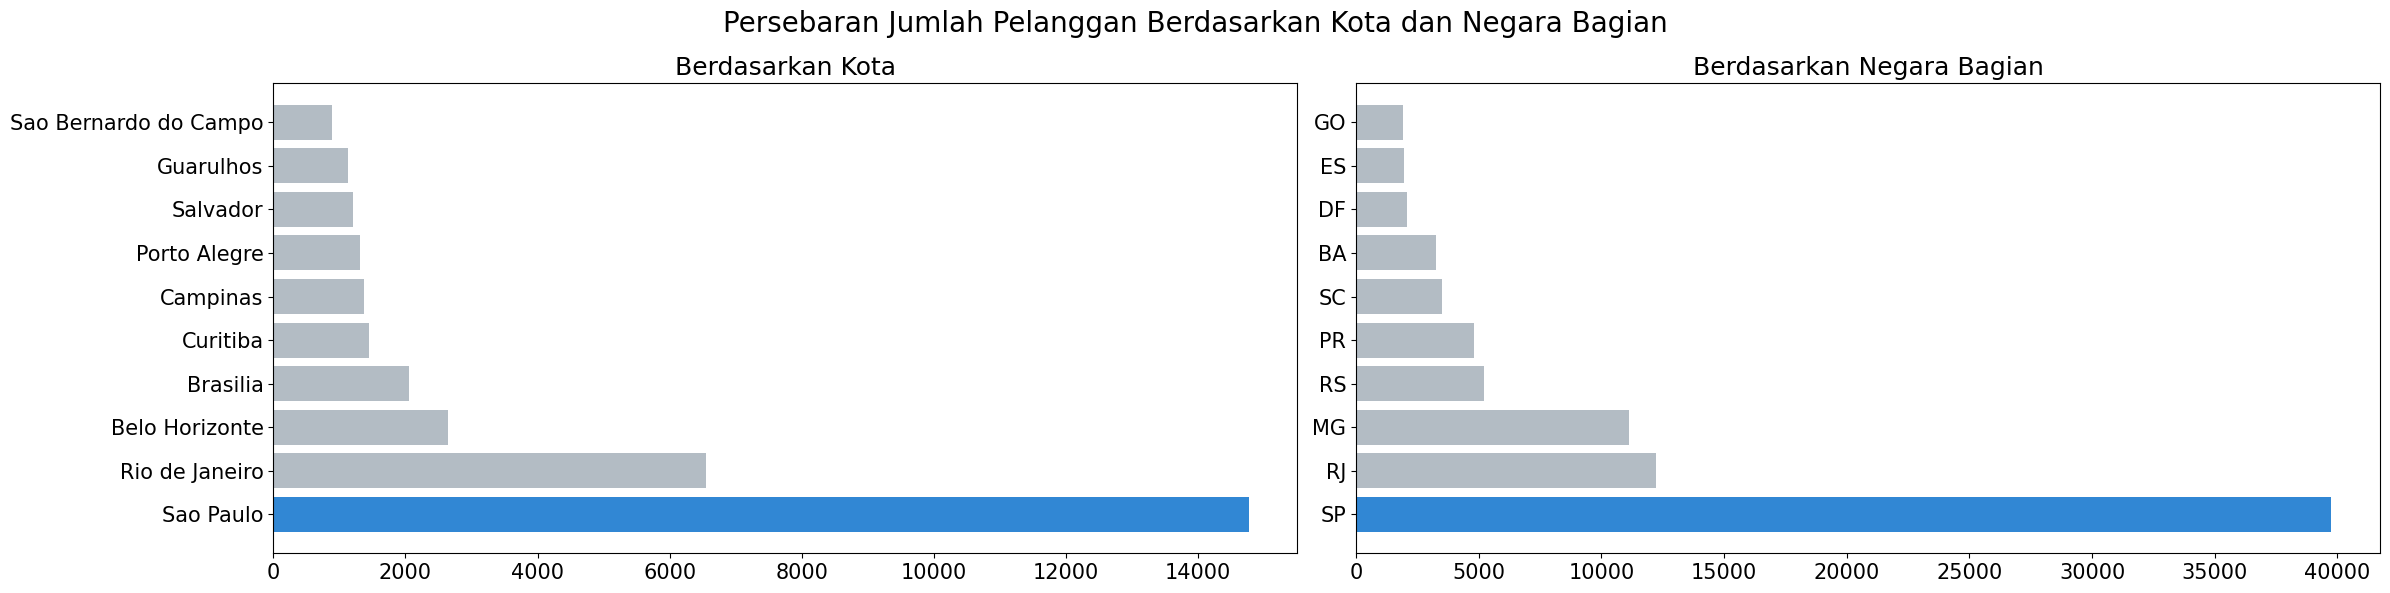

In [48]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

colors = ["#3187d4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4"]

# Plot berdasarkan Kota
ax[0].barh(customer_by_city.head(10)["customer_city"], customer_by_city.head(10)["customer_unique_id"], color=colors)
ax[0].set_xlabel(None)
ax[0].set_title("Berdasarkan Kota", loc="center", fontsize=18)
ax[0].tick_params(axis='x', labelsize=15)
ax[0].tick_params(axis='y', labelrotation=0, labelsize=15)

# Plot berdasarkan Negara Bagian
ax[1].barh(customer_by_state.head(10)["customer_state"], customer_by_state.head(10)["customer_unique_id"], color=colors)
ax[1].set_xlabel(None)
ax[1].set_title("Berdasarkan Negara Bagian", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15)
ax[1].tick_params(axis='y', labelrotation=0, labelsize=15)

plt.suptitle("Persebaran Jumlah Pelanggan Berdasarkan Kota dan Negara Bagian", fontsize=20)
plt.tight_layout()
plt.show()


<ipython-input-49-4369565e02f4>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="count_order", y="customer_unique_id", data= count_order_sort, palette=colors)


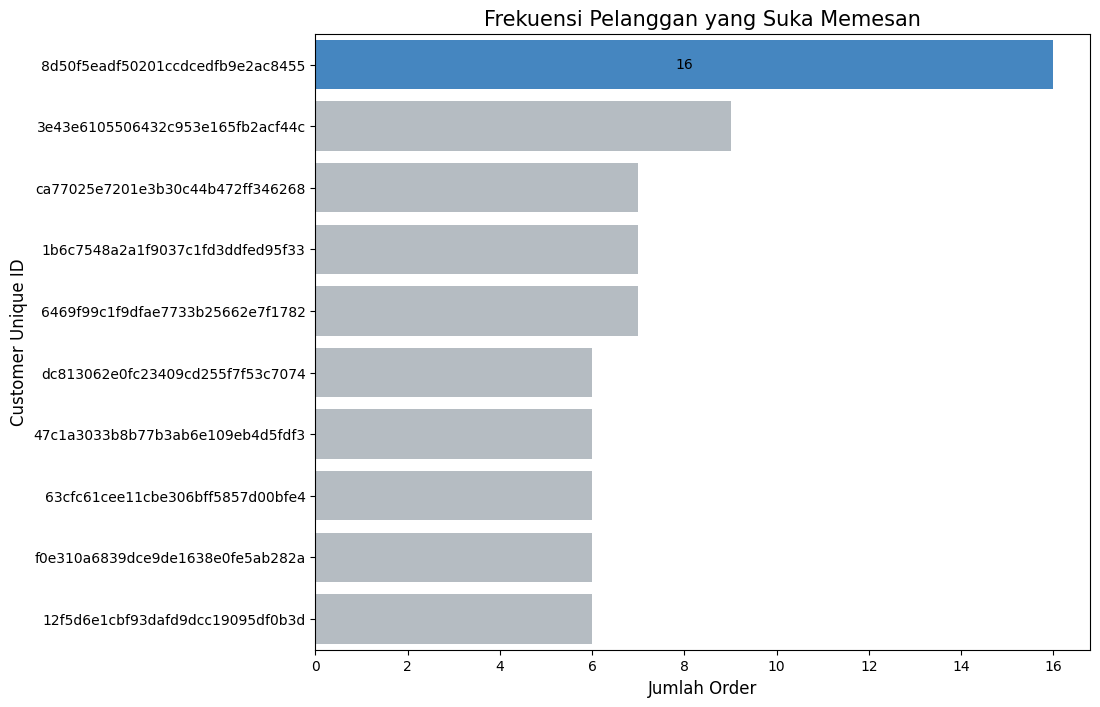

In [49]:
fig, ax = plt.subplots(figsize=(10, 8))

colors = ["#3187d4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4"]

sns.barplot(x="count_order", y="customer_unique_id", data= count_order_sort, palette=colors)
ax.set_ylabel('Customer Unique ID', fontsize=12)
ax.set_xlabel('Jumlah Order', fontsize=12)
ax.set_title("Frekuensi Pelanggan yang Suka Memesan", loc="center", fontsize=15)
ax.bar_label(ax.containers[0], label_type='center')
ax.tick_params(axis ='y', labelsize=10)

### Pertanyaan 2: Bagaimana penyebaran penjualan produk berdasarkan City dan State dengan seberapa banyak frekuensi produk yang berhasil terjual

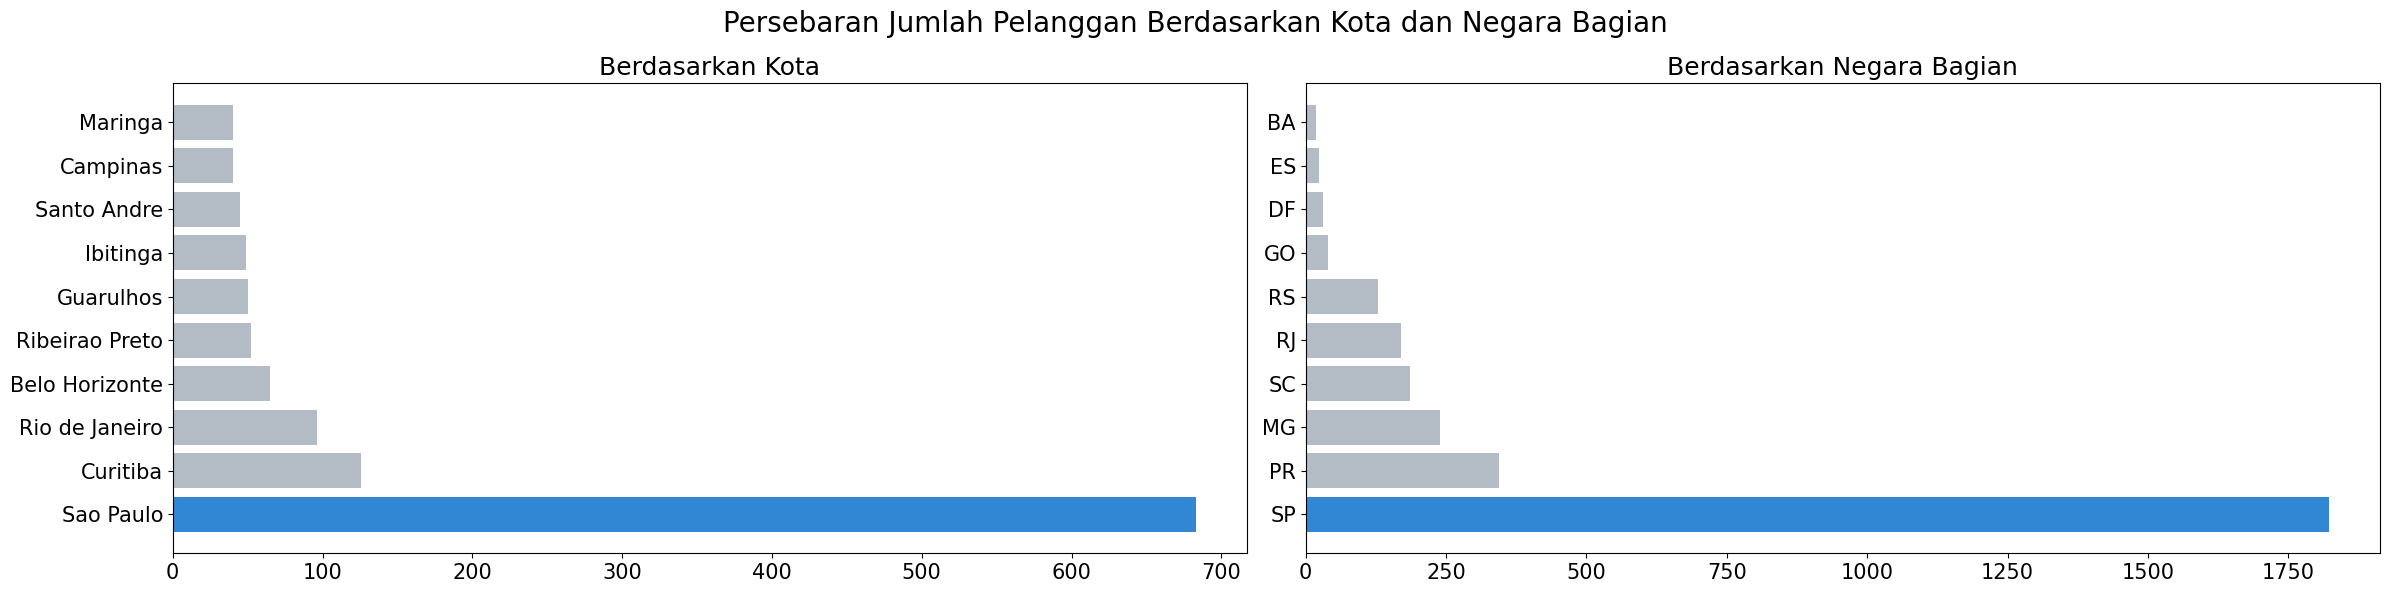

In [50]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

colors = ["#3187d4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4"]

# Plot berdasarkan Kota
ax[0].barh(seller_by_city.head(10)["seller_city"], seller_by_city.head(10)["seller_id"], color=colors)
ax[0].set_xlabel(None)
ax[0].set_title("Berdasarkan Kota", loc="center", fontsize=18)
ax[0].tick_params(axis='x', labelsize=15)
ax[0].tick_params(axis='y', labelrotation=0, labelsize=15)

# Plot berdasarkan Negara Bagian
ax[1].barh(seller_by_state.head(10)["seller_state"], seller_by_state.head(10)["seller_id"], color=colors)
ax[1].set_xlabel(None)
ax[1].set_title("Berdasarkan Negara Bagian", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15)
ax[1].tick_params(axis='y', labelrotation=0, labelsize=15)

plt.suptitle("Persebaran Jumlah Pelanggan Berdasarkan Kota dan Negara Bagian", fontsize=20)
plt.tight_layout()
plt.show()


<ipython-input-51-ed046e9fb852>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="seller_count_order", y="seller_id", data= seller_count_order, palette=colors)


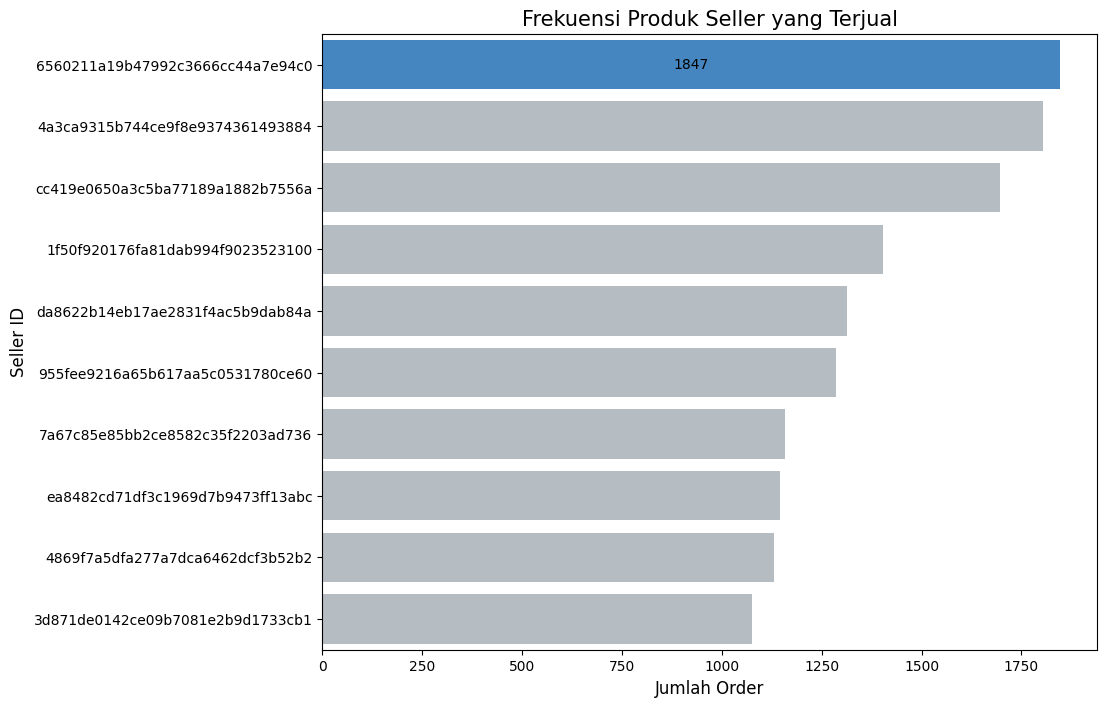

In [51]:
fig, ax = plt.subplots(figsize=(10, 8))

colors = ["#3187d4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4"]

sns.barplot(x="seller_count_order", y="seller_id", data= seller_count_order, palette=colors)
ax.set_ylabel('Seller ID', fontsize=12)
ax.set_xlabel('Jumlah Order', fontsize=12)
ax.set_title("Frekuensi Produk Seller yang Terjual", loc="center", fontsize=15)
ax.bar_label(ax.containers[0], label_type='center')
ax.tick_params(axis ='y', labelsize=10)

### Pertanyaan 3: Bagaimana ketertarikan pelanggan terhadap suatu produk, apa saja produk yang meraih penjualan terbanyak dan produk apa yang mendapatkan penjualn terendah


<ipython-input-52-89f7789cd2ca>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="num_of_order", y="product_category", data=order_by_product_category.sort_values(by=['num_of_order','sum_order_value'], ascending=False).head(10), palette=colors)


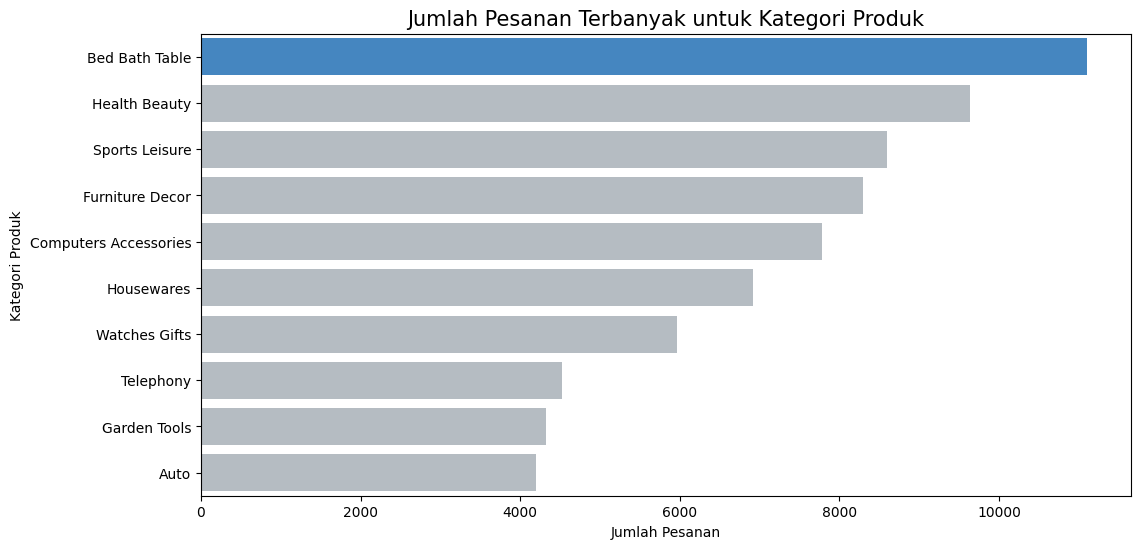

In [52]:
colors = ["#3187d4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4"]
plt.figure(figsize=(12, 6))

sns.barplot(x="num_of_order", y="product_category", data=order_by_product_category.sort_values(by=['num_of_order','sum_order_value'], ascending=False).head(10), palette=colors)
plt.xlabel('Jumlah Pesanan')
plt.ylabel('Kategori Produk')
plt.title('Jumlah Pesanan Terbanyak untuk Kategori Produk', fontsize=15)
plt.show()

<ipython-input-53-be57191e7e18>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="num_of_order", y="product_category", data=order_by_product_category.sort_values(by=['num_of_order','sum_order_value']).head(10), palette=colors)


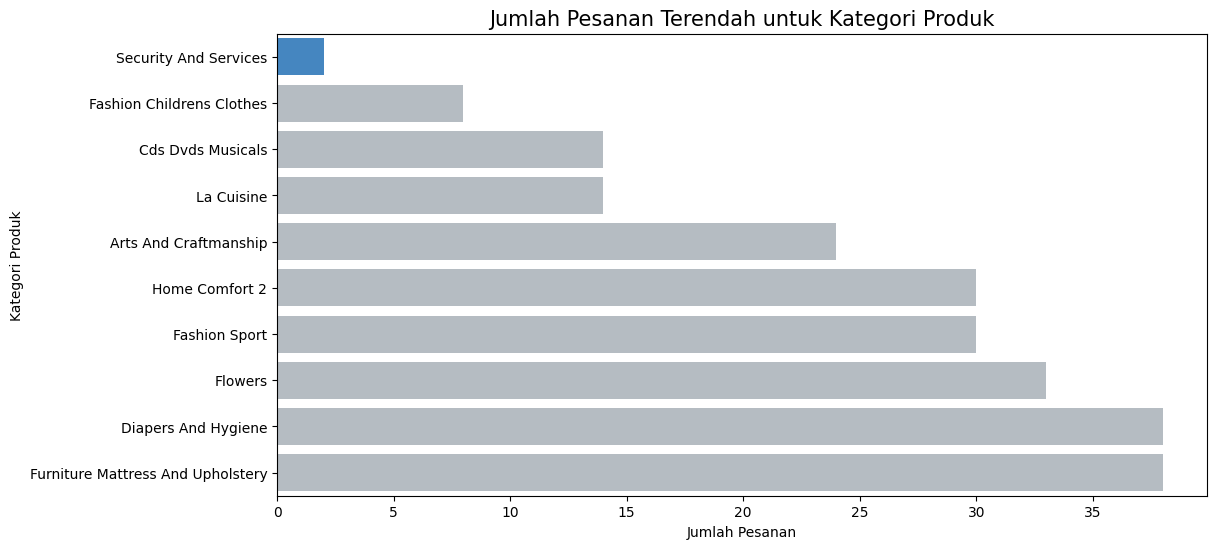

In [53]:
colors = ["#3187d4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4"]
plt.figure(figsize=(12, 6))

sns.barplot(x="num_of_order", y="product_category", data=order_by_product_category.sort_values(by=['num_of_order','sum_order_value']).head(10), palette=colors)
plt.xlabel('Jumlah Pesanan')
plt.ylabel('Kategori Produk')
plt.title('Jumlah Pesanan Terendah untuk Kategori Produk', fontsize=15)
plt.show()

### Pertanyaan 4: Bagaimana waktu dapat memengaruhi pelanggan untuk pembelian suatu produk

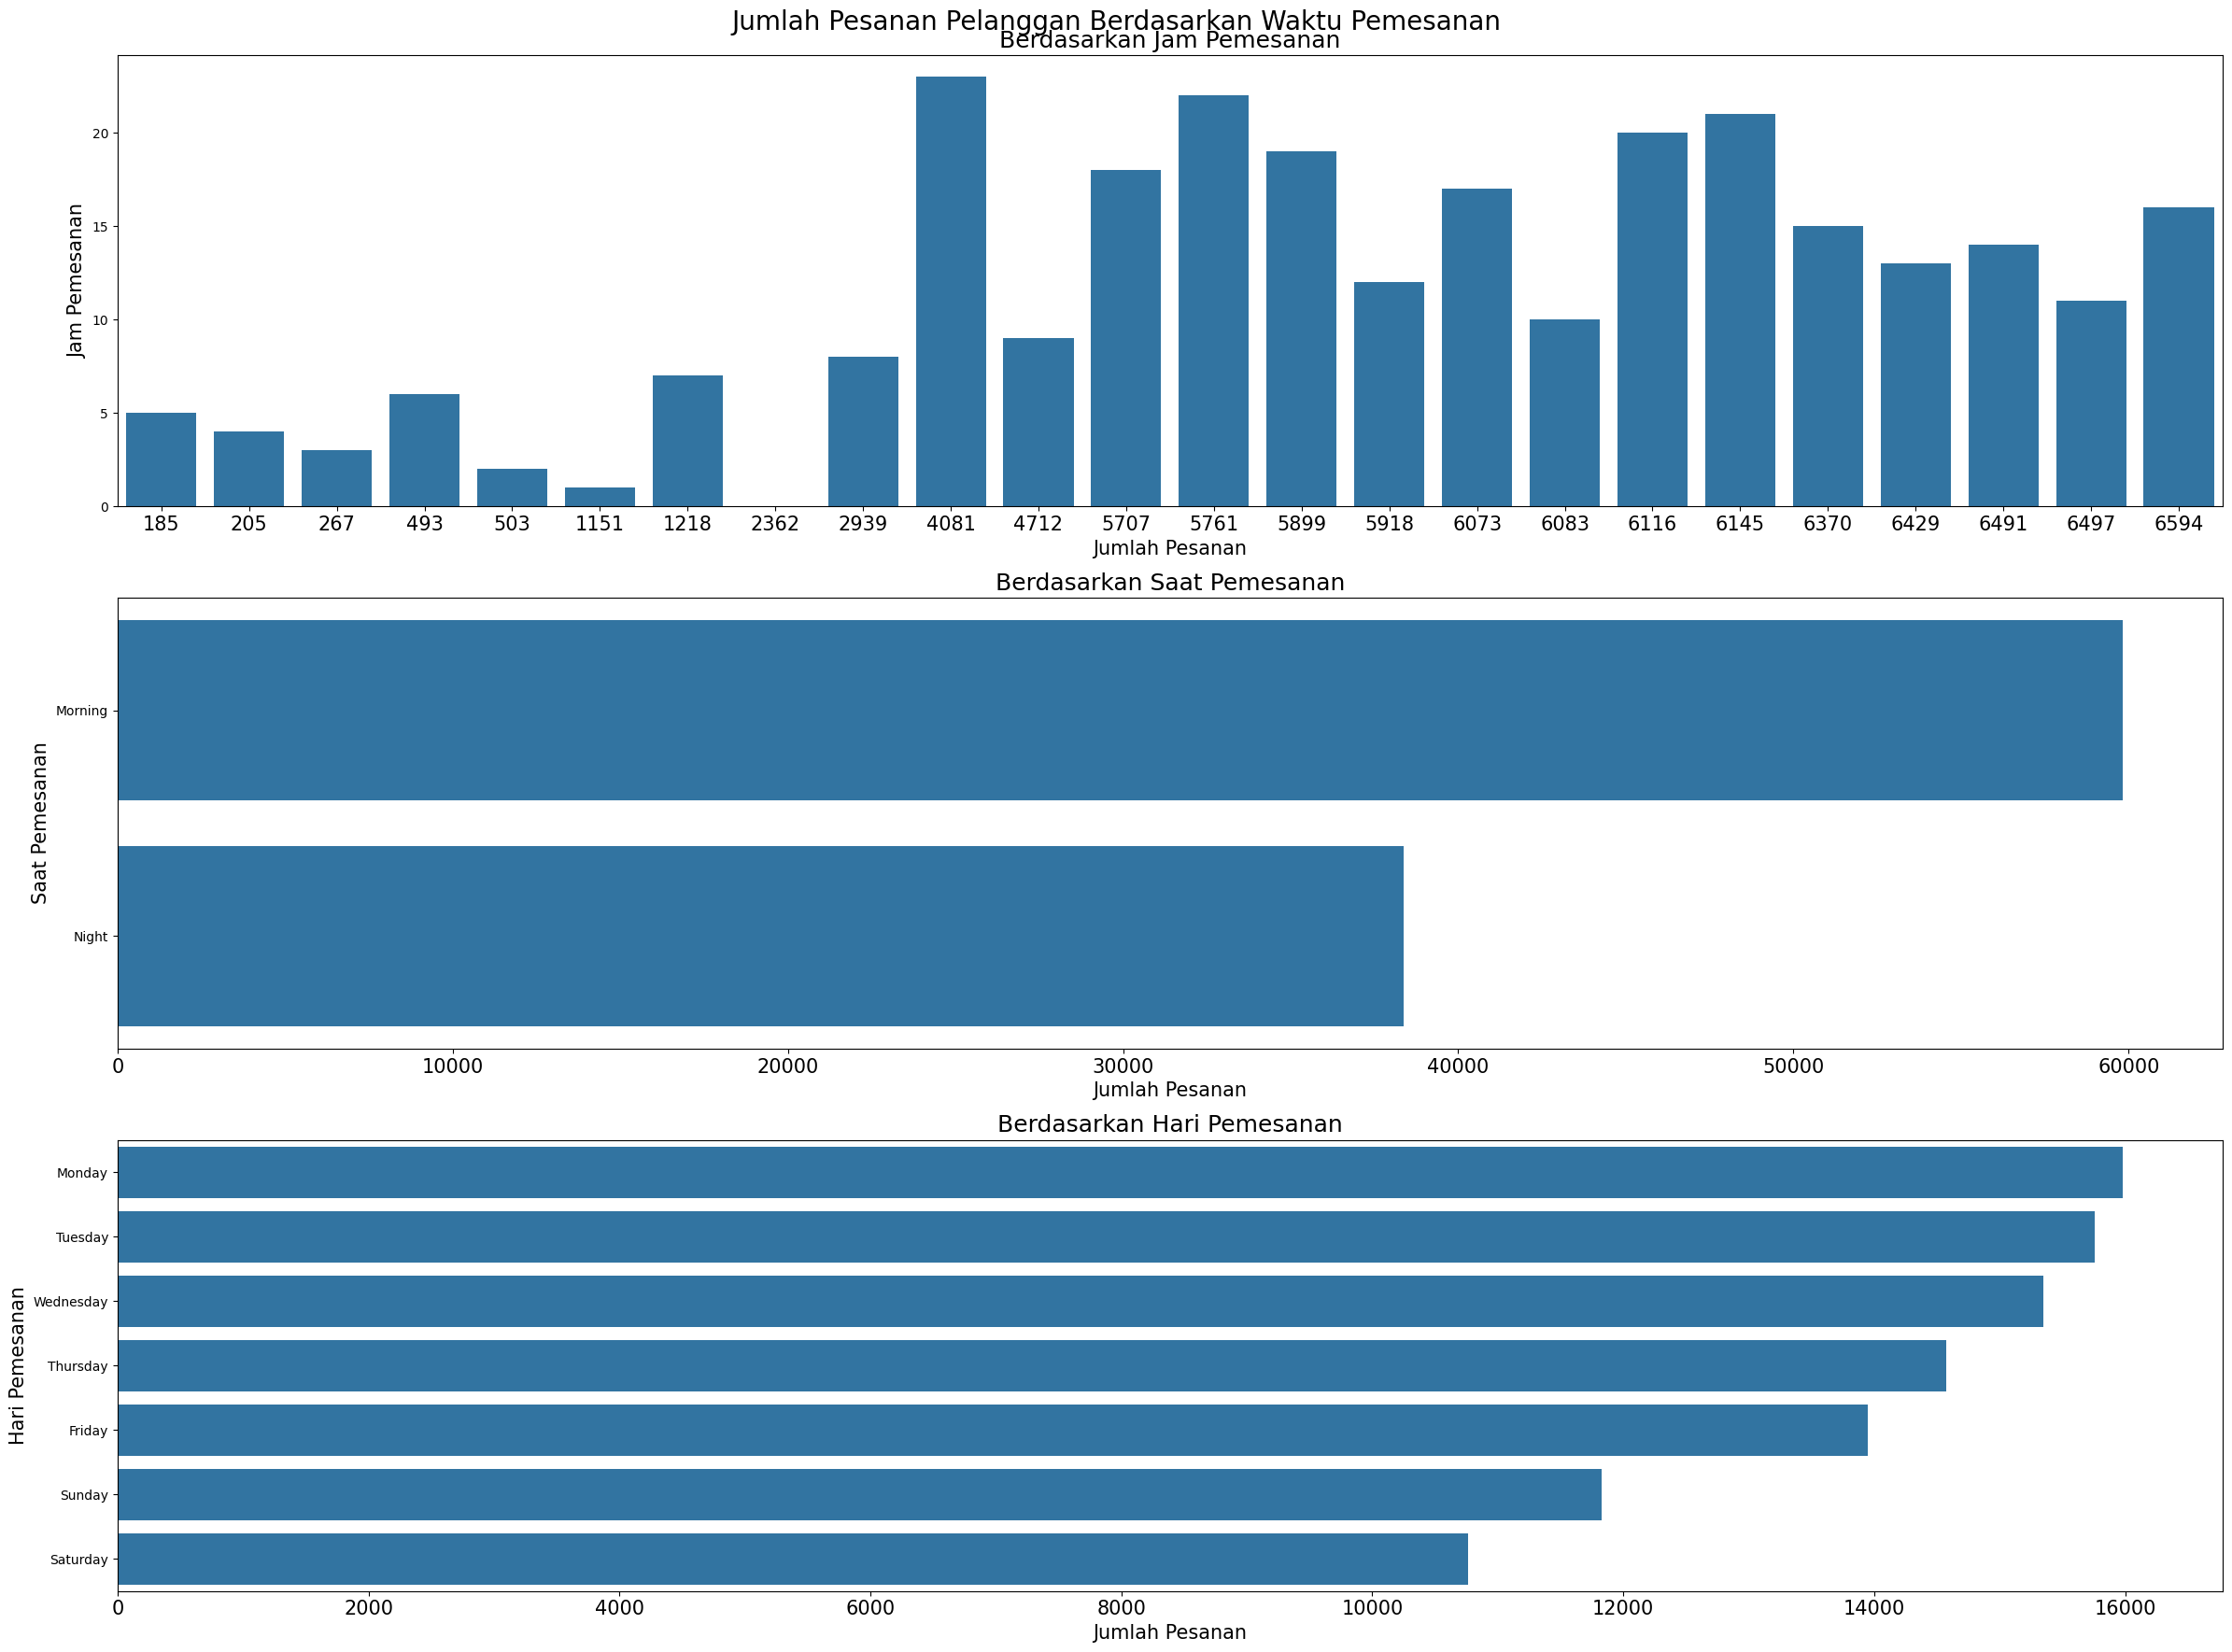

In [54]:
fig, axs = plt.subplots(nrows=3, figsize=(24, 18))

# Bar Plot Berdasarkan Jam Pemesanan
sns.barplot(
    y="hour_order",
    x="order_id",
    data=hour_count.sort_values(by='hour_order', ascending=True),
    ax=axs[0]
)
axs[0].set_xlabel('Jumlah Pesanan', fontsize=15)
axs[0].set_ylabel('Jam Pemesanan', fontsize=15)
axs[0].set_title("Berdasarkan Jam Pemesanan", loc="center", fontsize=18)
axs[0].tick_params(axis='x', labelsize=15)

# Bar Plot Berdasarkan Saat Pemesanan
sns.barplot(
    y="daytime_order",
    x="order_id",
    data=full_join_df.groupby('daytime_order').order_id.nunique().reset_index(),
    ax=axs[1]
)
axs[1].set_xlabel('Jumlah Pesanan', fontsize=15)
axs[1].set_ylabel('Saat Pemesanan', fontsize=15)
axs[1].set_title("Berdasarkan Saat Pemesanan", loc="center", fontsize=18)
axs[1].tick_params(axis='x', labelsize=15)

# Bar Plot Berdasarkan Hari Pemesanan
sns.barplot(
    y="day_order",
    x="order_id",
    data=full_join_df.groupby('day_order').order_id.nunique().reset_index().sort_values(by='order_id', ascending=False),
    ax=axs[2]
)
axs[2].set_xlabel('Jumlah Pesanan', fontsize=15)
axs[2].set_ylabel('Hari Pemesanan', fontsize=15)
axs[2].set_title("Berdasarkan Hari Pemesanan", loc="center", fontsize=18)
axs[2].tick_params(axis='x', labelsize=15)

plt.suptitle("Jumlah Pesanan Pelanggan Berdasarkan Waktu Pemesanan", fontsize=20)
plt.tight_layout()
plt.show()

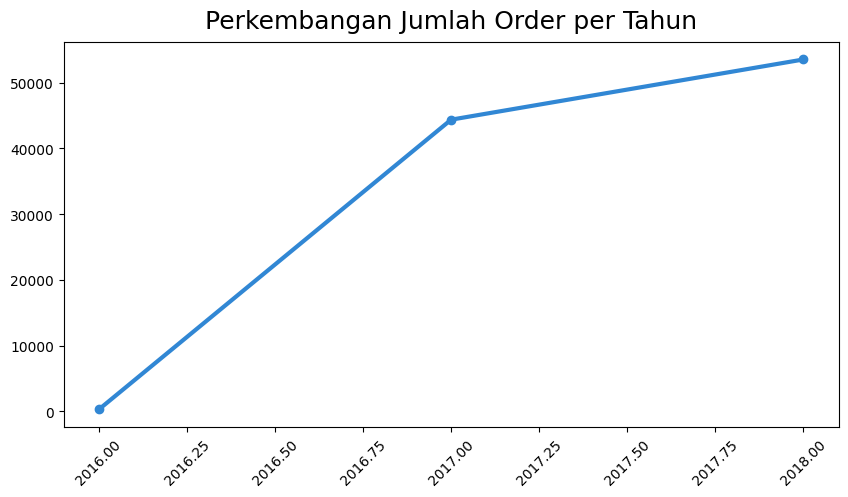

In [55]:
plt.figure(figsize=(10, 5))
plt.plot(
    yearly_orders.year,
    yearly_orders.count_order,
    marker= 'o',
    linewidth= 3,
    color= "#3187d4"
    )
plt.title("Perkembangan Jumlah Order per Tahun" , loc="center", fontsize=18, pad=10)
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)

plt.show()

# Pelanggan mana yang memiliki high value (sering melakukan transaksi dan menghasilkan revenue yang besar)

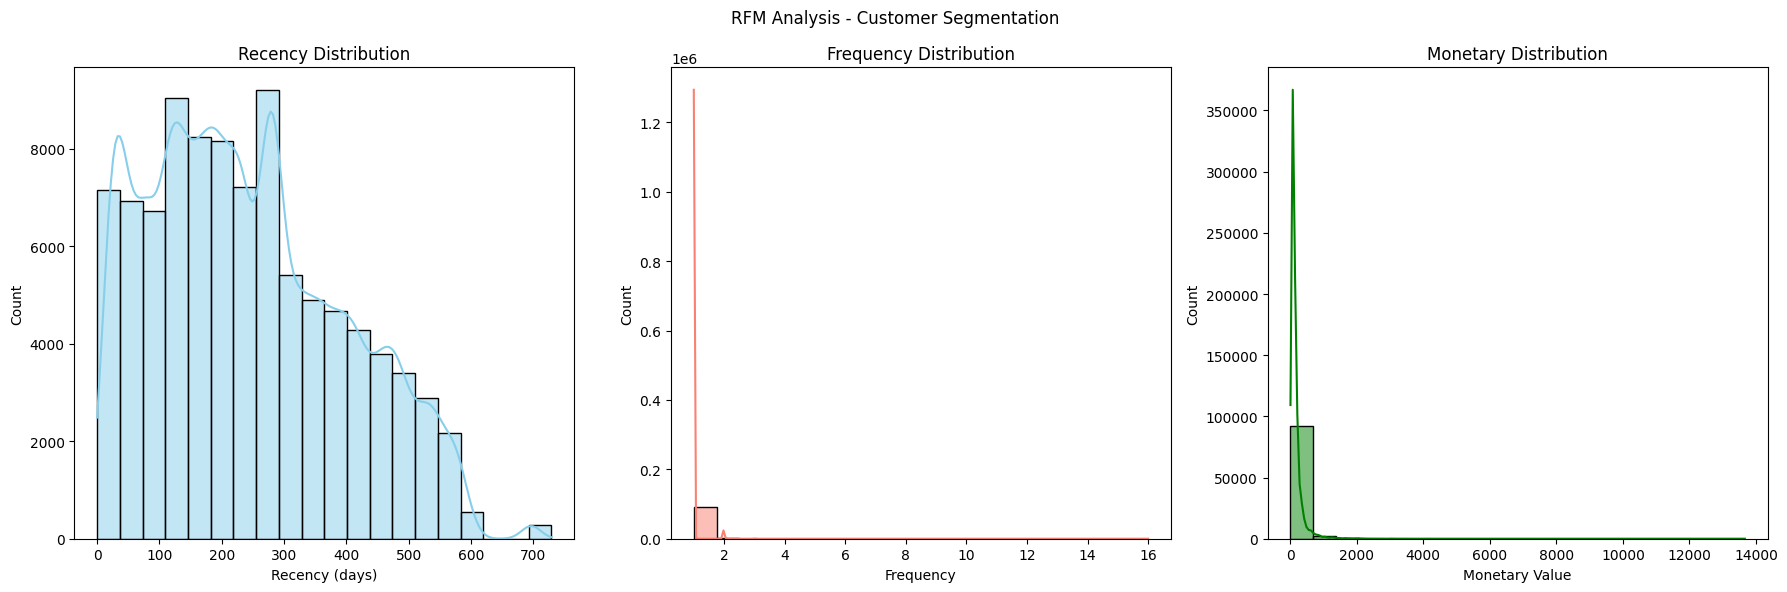

In [56]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

sns.histplot(rfm_df['recency'], bins=20, kde=True, color='skyblue', ax=axs[0])
axs[0].set_title('Recency Distribution')
axs[0].set_xlabel('Recency (days)')

sns.histplot(rfm_df['frequency'], bins=20, kde=True, color='salmon', ax=axs[1])
axs[1].set_title('Frequency Distribution')
axs[1].set_xlabel('Frequency')

sns.histplot(rfm_df['monetary'], bins=20, kde=True, color='green', ax=axs[2])
axs[2].set_title('Monetary Distribution')
axs[2].set_xlabel('Monetary Value')

plt.suptitle('RFM Analysis - Customer Segmentation')
plt.tight_layout()
plt.show()


<ipython-input-57-47d2cb5c4f95>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x, y=y, data=data, palette=colors, ax=ax)
<ipython-input-57-47d2cb5c4f95>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=14)
<ipython-input-57-47d2cb5c4f95>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x, y=y, data=data, palette=colors, ax=ax)
<ipython-input-57-47d2cb5c4f95>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=14)
<ipython-input-57-47d2cb5c4f95

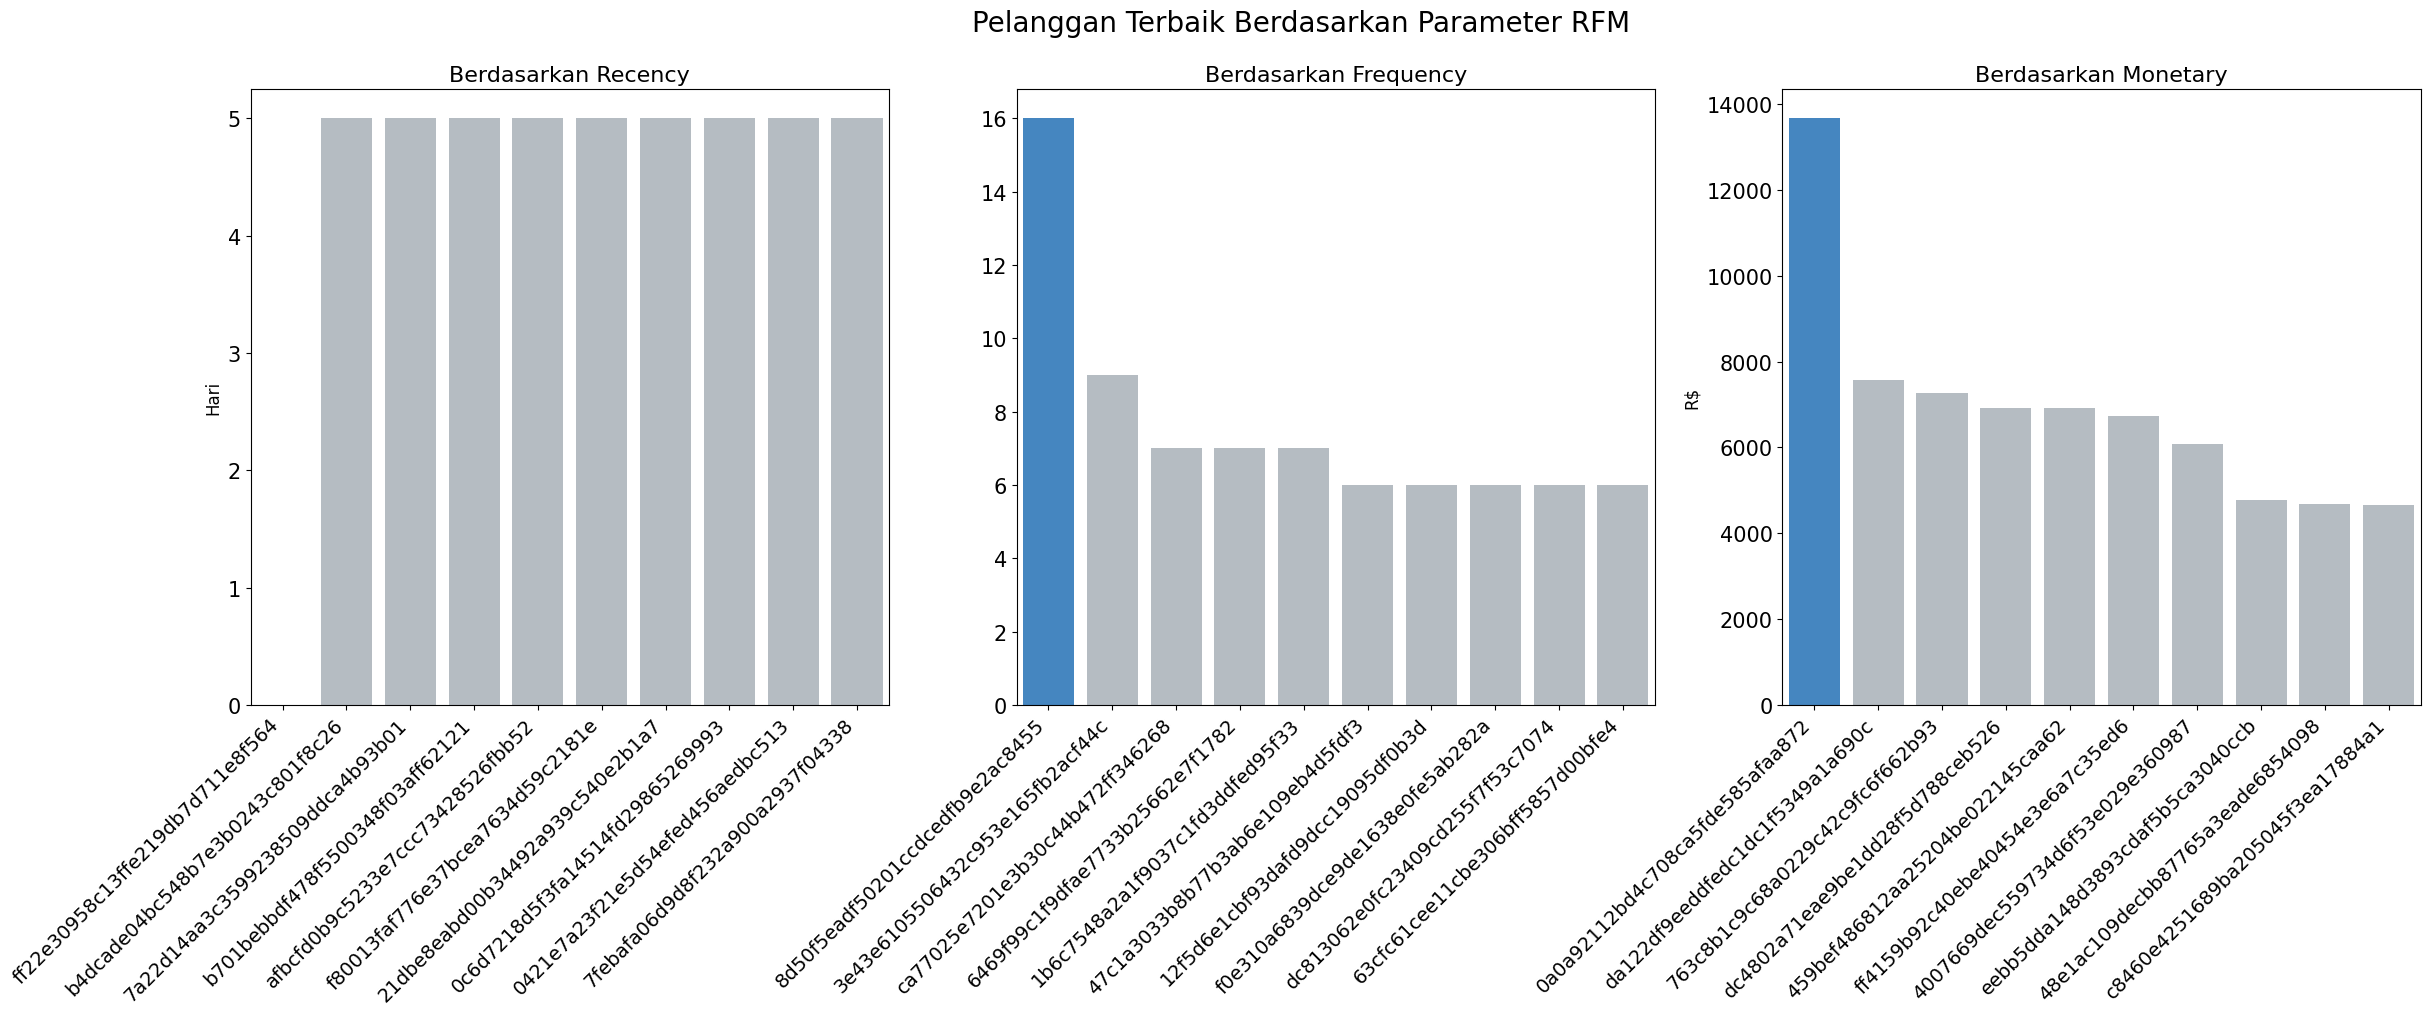

In [57]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(28, 8))
colors = ["#3187d4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4", "#b3bcc4"]

# Fungsi untuk membuat bar plot
def create_bar_plot(x, y, data, ax, ylabel, title):
    sns.barplot(x=x, y=y, data=data, palette=colors, ax=ax)
    ax.set_ylabel(ylabel, fontsize=12)
    ax.set_xlabel(None)
    ax.set_title(title, loc="center", fontsize=16)
    ax.tick_params(axis='y', labelsize=15)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=14)

# Bar plot Recency
create_bar_plot("customer_unique_id", "recency", rfm_df.sort_values(by='recency', ascending=True).head(10), axs[0], 'Hari', 'Berdasarkan Recency')

# Bar plot Frequency
create_bar_plot("customer_unique_id", "frequency", rfm_df.sort_values(by='frequency', ascending=False).head(10), axs[1], None, 'Berdasarkan Frequency')

# Bar plot Monetary
create_bar_plot("customer_unique_id", "monetary", rfm_df.sort_values(by='monetary', ascending=False).head(10), axs[2], 'R$', 'Berdasarkan Monetary')

plt.suptitle("Pelanggan Terbaik Berdasarkan Parameter RFM", fontsize=20)
plt.show()


## Conclusion


1.   Bagaimana penyebaran pembelian produk berdasarkan pelanggan dan seberapa banyak frekuensi pembelian oleh pelanggan
2.   Bagaimana penyebaran penjualan produk berdasarkan City dan State dengan seberapa banyak frekuensi produk yang berhasil terjual
3.   Bagaimana ketertarikan pelanggan terhadap suatu produk, apa saja produk yang meraih penjualan terbanyak dan produk apa yang mendapatkan penjualn terendah
4.   Bagaimana waktu dapat memengaruhi pelanggan untuk pembelian suatu produk





- Penyebaran pembelian produk oleh pelanggan berdasarakan State dan City dengan nilai tertinggi yaitu berada di Sao Paulo. Dengan pelanggan dengan id : 8d50f5eadf50201ccdcedfb9e2ac8455	memiliki pembelian terbanyak yaitu sebanyak 16 kali dari total ia belanja

- Penyebaran penjualan produk oleh seller berdasarkan State dan City dengan nilai tertinggi berada di Sao Paulo, disusul oleh Curitiba pada City dan PR pada State. Sedangkan dengan penjualan terbanyak jatuh kepada seller dengan id : 6560211a19b47992c3666cc44a7e94c0 dengan penjualan sebanyak 1847 produk

- Sejauh penjualan berlangsung, para pelanggan tertarik dengan adanya produk Bed Bath Table yang menduduki peringkat penjualan produk terlaku. Sedangkan produk yang tidak terlalu laku terjual berada di Security and Services

- E-commerce ini memiliki waktu demand biasanya pada hari senin dalam rentang pagi, yaitu jam 6-12. Namun jam saat pesanan itu banyak akan diperkirakan pada jam 16:00. Tren yang dimiliki E-commerce ini sangat positif, bisa kita lihat pada perkembangan pertahunnya terus tumbuh yang menandakan E-commerce telah menetapkan strategi yang efektif untuk bersaing dengan kompetitor lainnya

In [58]:
# Mengubah data df menjadi csv
full_join_df.to_csv('main_data_for_dashboard.csv', index=False)